# Algoritmos supervisionados:
## Árvores de decisão

"A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes." IBM

"Uma árvore de decisão é um algoritmo de aprendizado supervisionado não paramétrico, que é utilizado tanto para tarefas de classificação quanto de regressão. Possui uma estrutura hierárquica em forma de árvore, que consiste em um nó raiz, ramos, nós internos e nós folha." IBM


(Em termos simples, técnicas não paramêtricas não dependem que o dado pertença a uma distribuição particular)

## Os componentes da árvore de decisão

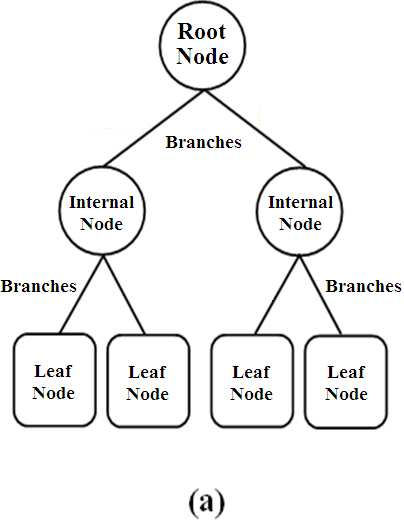

## Um exemplo preliminar

Antes de começar uma explicação teórica mais profunda, vamos analisar um exemplo de problema que **pode** ser representado com árvores de decisão:

- Akinator



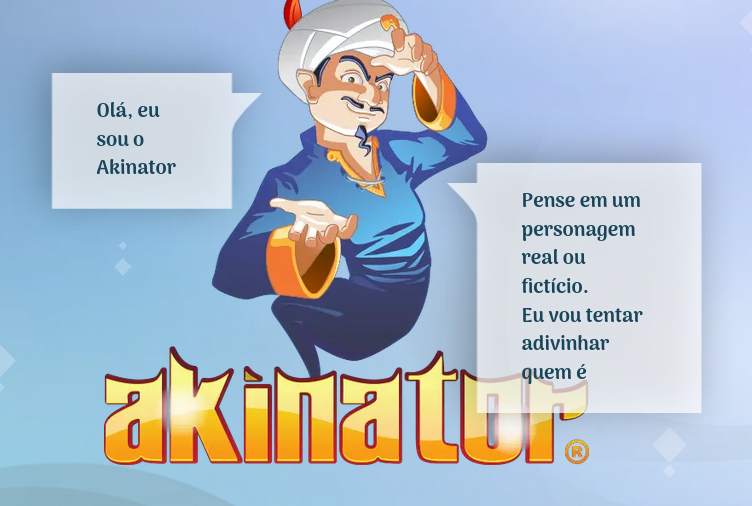

https://pt.akinator.com/

## Representação

Podemos representar perguntas feitas pelo akinator e nossas respostas como uma árvore.

No final o Akinator adivinha o personagem pensado baseado nessas respostas.


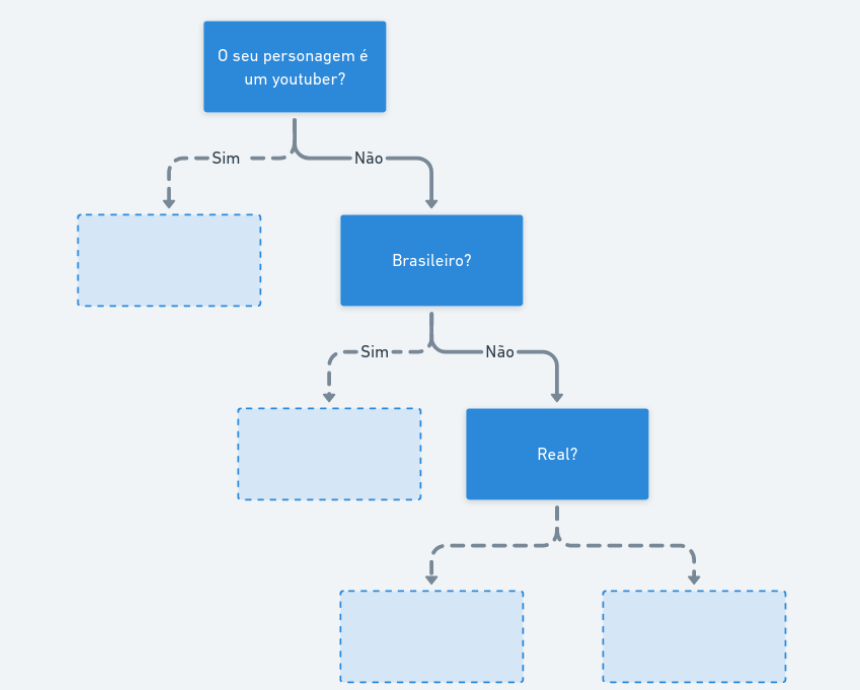

Qual o motivo do Akinator não formular perguntas mais específicas logo o início? Exemplo:
- Seria um personagem de um livro que possui capacidade de utilizar feitiços?


## Um passo de cada vez

A criação dessa árvore relacionando uma decisão a uma **sequência de perguntas e respostas** pode ser feita de maneira intuitiva. Mas antes disso, vamos definir a idéia de impureza

Na imagem abaixo, para cada um das caixas perceba como amostras trazem uma quantidade diferente em relacao a cor de bola.

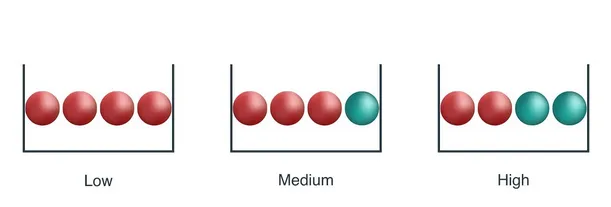

## Situação

Alguém quer decidir se vai para a praia ou fica em casa num domingo.

De maneira intuitiva, quão bem essas perguntas conseguem separar entre uma decisão e a outra?


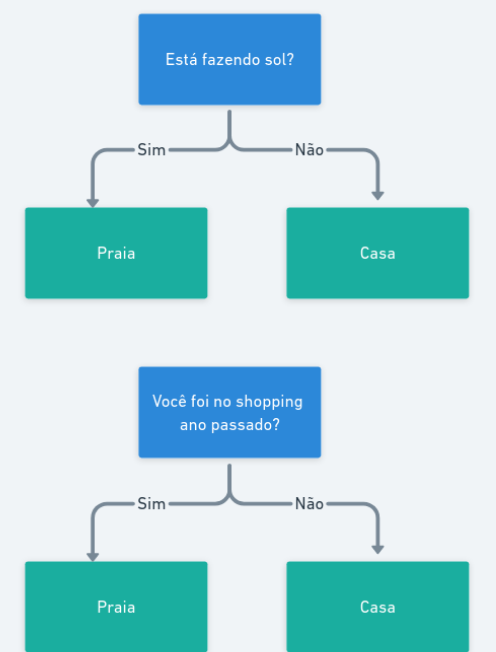

# Medidas de impureza

Nesse algoritmo $p_i$ seria a proporcao de elementos que pertencem a uma classe

- Entropia
(pi n° de amostras dividido pelo total)

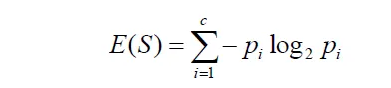

- Gini

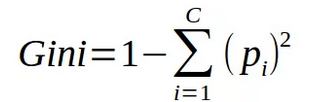

## Um exemplo


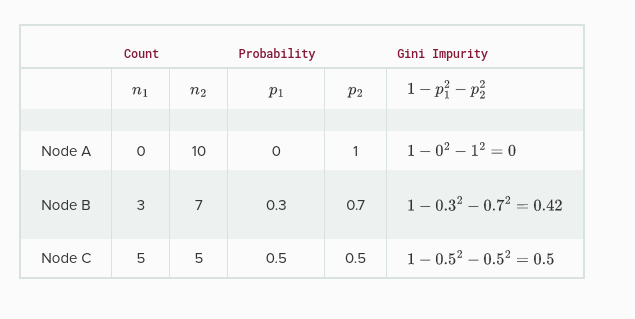

Source: https://www.learndatasci.com/glossary/gini-impurity/

## Montando uma árvore

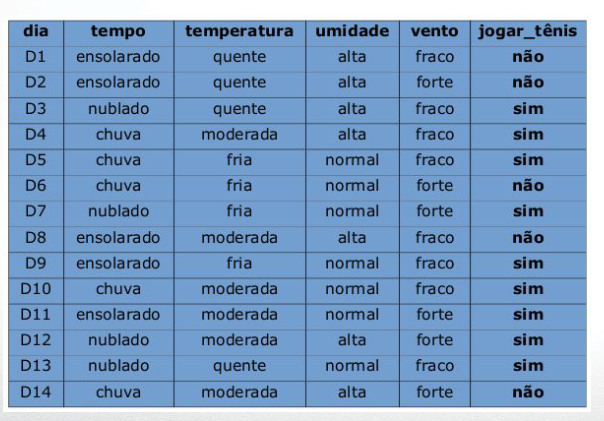

Podemos montar uma árvore como essa que representa bem essa tabela

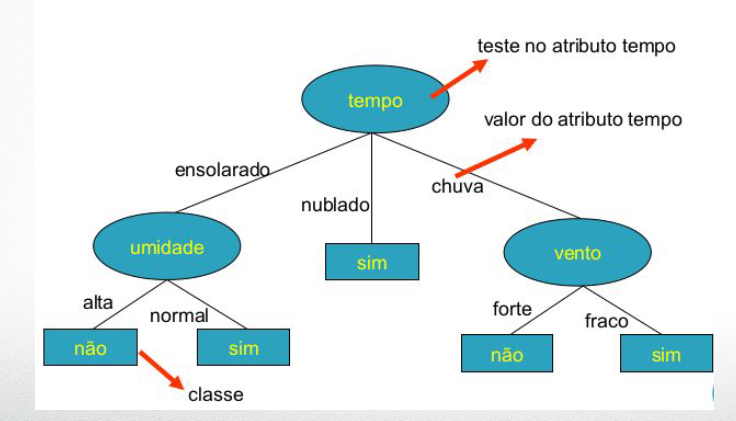

# Tipos de árvores de decisão

- ID3 (Iterative Dichotomiser 3) desenvolvido em 1986 e feito para variáveis categóricas.
- C4.5 sucessor do ID3 e também funciona para variáveis numéricas e dados faltantes
- C5.0 sucessor do C4.5  (Proprietário) tem melhor desempenho que seu antecessor
- **CART (Classification and Regression Trees) disponível no SKLEARN**

## Treinamento de uma árvore de decisão

Vamos utilizar o clássico IRIS dataset.

Para visualizar corretamente o gráfico execute os seguintes comandos no seu terminal do linux

(ou comandos equivalentes no seu sistema operacional)

In [ ]:
sudo apt-get install graphviz
pip install graphviz

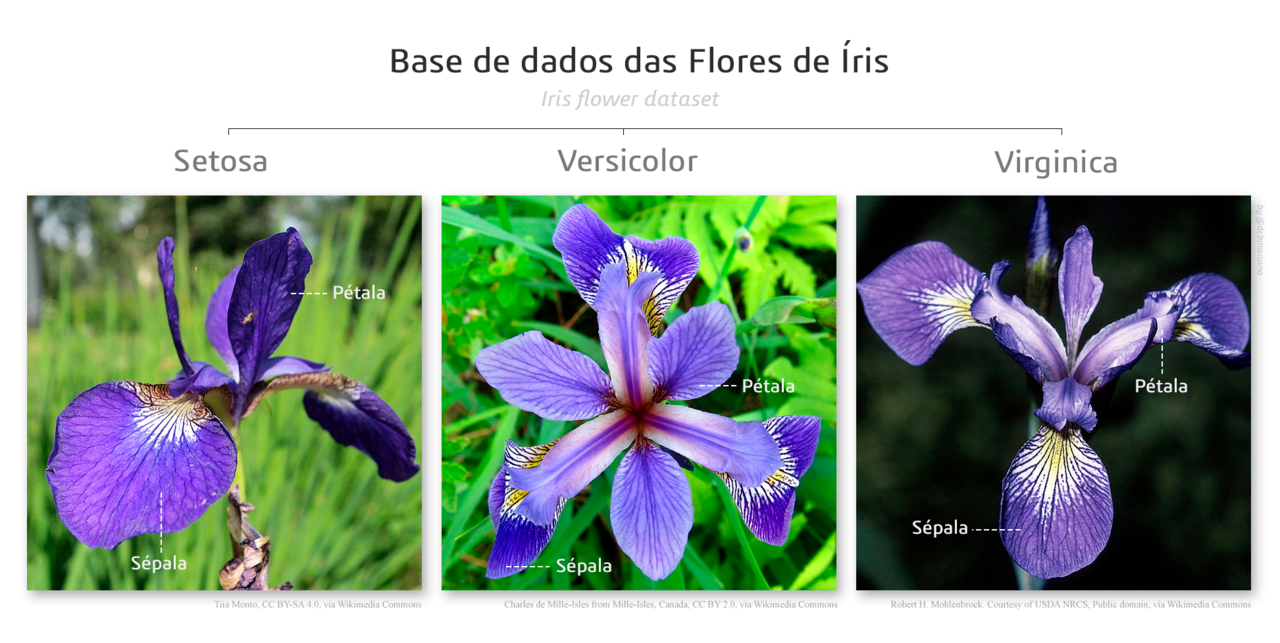

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz

# Carregando o dataset IRIS
iris = load_iris()

# Separando o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=22)

# Inicializando o classificador
# Vamos gerar uma árvore com os parâmetros mais básicos
# Discutimos os problemas logo em seguida
clf = DecisionTreeClassifier()

# Treinando no dataset de treino
clf.fit(X_train, y_train)

# Realizando predição
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Exportando o gráfico
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Visualizando o gráfico
graph = graphviz.Source(dot_data)
graph.view()

Accuracy: 0.8666666666666667


'Source.gv.pdf'

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/neiva/snap/code/common/.cache/gio-modules/libgiolibproxy.so

(process:7343): Gtk-WARNING **: 20:53:03.071: Locale not supported by C library.
	Using the fallback 'C' locale.
/home/neiva/snap/code/common/.cache/gio-modules/libgiolibproxy.so: cannot open shared object file: Permission denied
Failed to load module: /home/neiva/snap/code/common/.cache/gio-modules/libgiolibproxy.so

(evince:7343): Gtk-WARNING **: 20:53:03.129: Theme parsing error: gtk-keys.css:1:0: Failed to import: Error opening file /snap/code/141/usr/share/themes/Default/gtk-3.0/gtk-keys.css: Permission denied
Gtk-Message: 20:53:03.129: Failed to load module "canberra-gtk-module"
Gtk-Message: 20:53:03.131: Failed to load module "canberra-gtk-module"


/home/neiva/snap/code/common/.cache/gio-modules/libdconfsettings.so: cannot open shared object file: Permission denied
Failed to load module: /home/neiva/snap/code/common/.cache/gio-modules/libdconfsettings.so

(evince:7343): Gtk-WARNING **: 20:53:04.188: Could not load a pixbuf from icon theme.
This may indicate that pixbuf loaders or the mime database could not be found.


Resultado:

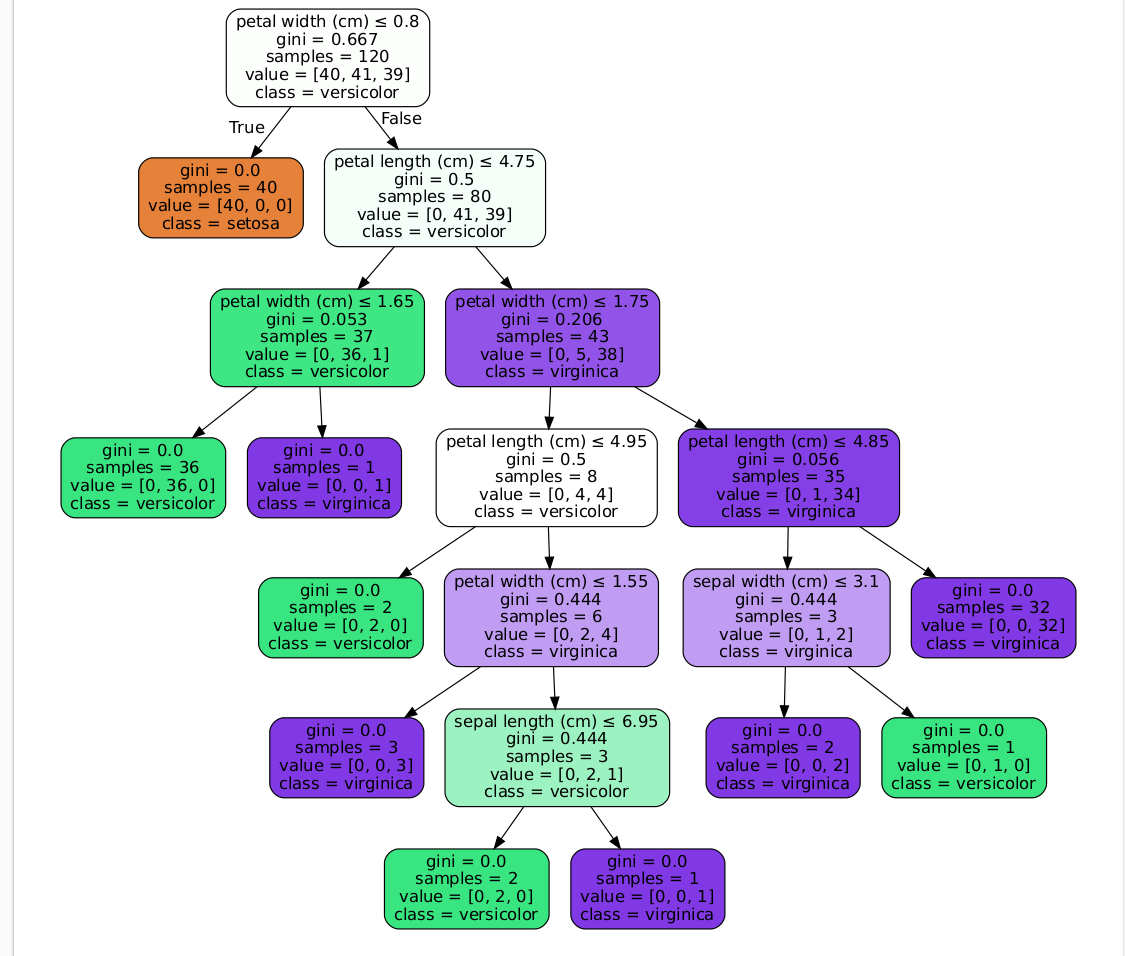

## Vantagens

-  Árvores podem ser visualizadas.

- Requer pouca preparação de dados. Não requer normalização de dados, criação de variáveis ​​dummy e remoção de valores em branco.

- Tem um bom desempenho mesmo que suas suposições sejam um pouco violadas pelo modelo real a partir do qual os dados foram gerados.

## Desvantagens

- Os aprendizes de árvore de decisão podem criar árvores excessivamente complexas que não generalizam bem os dados. Ou seja, requer técnicas de *pruning* ou similares.

- As previsões das árvores de decisão não são suaves nem contínuas, mas aproximações constantes em pedaços, como visto na figura abaixo. **Portanto, elas não são boas em extrapolação.**

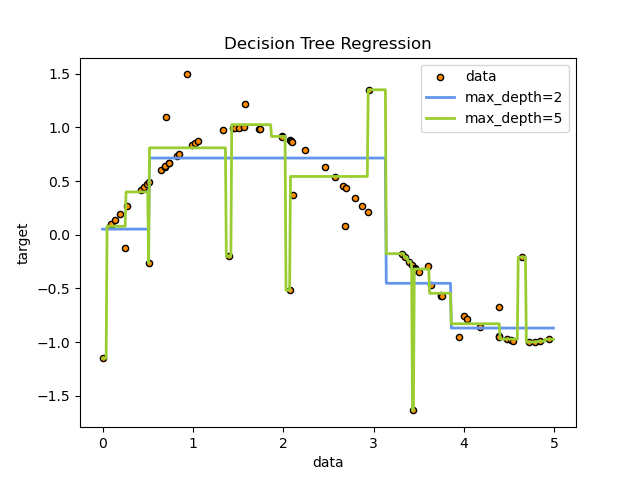

Fonte da imagem: https://scikit-learn.org

##  Alguns parâmetros importantes das árvores de decisão no sklearn

- max_depth: este parâmetro controla a profundidade máxima da árvore.

<!-- Uma árvore mais profunda pode se ajustar melhor aos dados de treinamento, mas corre o risco de superajustar. Portanto, é importante ajustar o max_depth adequadamente para obter uma boa generalização. -->

- min_samples_split: este parâmetro define o número mínimo de amostras necessárias para dividir um nó interno (internal node). Se uma divisão resultar em um número menor de amostras do que o min_samples_split, a divisão não será realizada.
 <!-- Este parâmetro controla a complexidade da árvore e é importante ajustá-lo adequadamente para evitar árvores superajustadas. -->

- criterion: este parâmetro define a função de medição de qualidade da divisão. O critério padrão é "gini", que é uma medida de impureza.

## Outros parâmetros

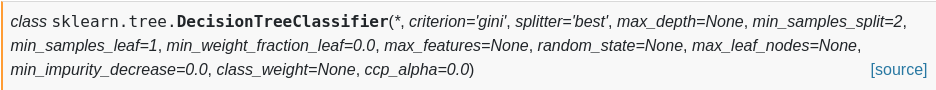

## Extra dados paramétricos:

Uma maneira simples de determinar se os dados são paramétricos é com o gráfico Q-Q (Quantile-Quantile). Nesses gráficos, os dados observados são plotados contra o quantil esperado de uma distribuição normal.

Características de dados paramétricos:

- Normalidade - Os dados de cada grupo devem ter distribuição normal.
- Independência - Os dados de cada grupo devem ser amostrados de forma aleatória e independente.
- Ausência de Outliers - Não deve haver outliers extremos nos dados.
- Variância igual - Os dados de cada grupo devem ter variância aproximadamente igual.


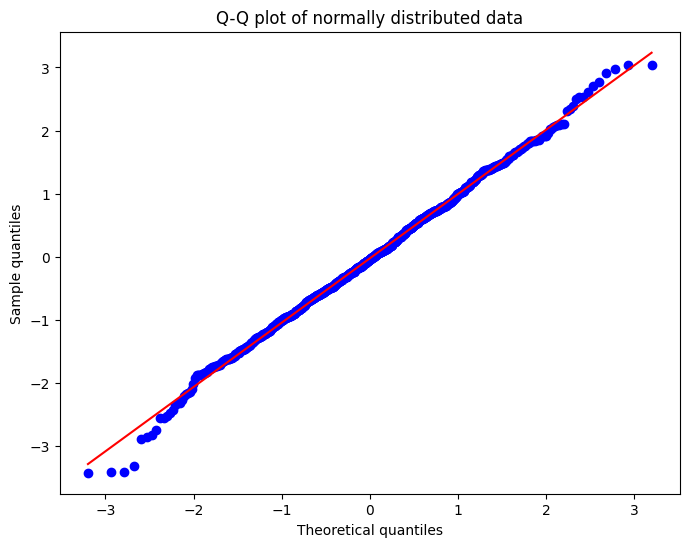

In [ ]:

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Geração de dados aleatórios
mu, sigma = 0, 1
data = np.random.normal(mu, sigma, 1000)

# Fazer um plot quantile-quantile para verificar distribuição dos dados
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(data, plot=ax)
ax.set_title('Q-Q plot of normally distributed data')
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Sample quantiles')
plt.show()
